In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
control_data = np.genfromtxt('data/control.csv', delimiter=',')
bl_data = np.genfromtxt('data/body_lotion.csv', delimiter=',')
alcohol_data = np.genfromtxt('data/alcohol.csv', delimiter=',')

In [3]:
col_val = 's1 s2 s3 s4 s5 s6 s7 s8'.split()

In [4]:
control_df = pd.DataFrame(data=control_data, columns=col_val)
alcohol_df = pd.DataFrame(data=alcohol_data, columns=col_val)
bl_df = pd.DataFrame(bl_data, columns=col_val)

In [5]:
alcohol_df = alcohol_df.dropna()

In [6]:
control_df['target'] = 'control'
alcohol_df['target'] = 'alcohol'
bl_df['target'] = 'body lotion'

In [7]:
df = pd.concat([control_df, alcohol_df, bl_df])

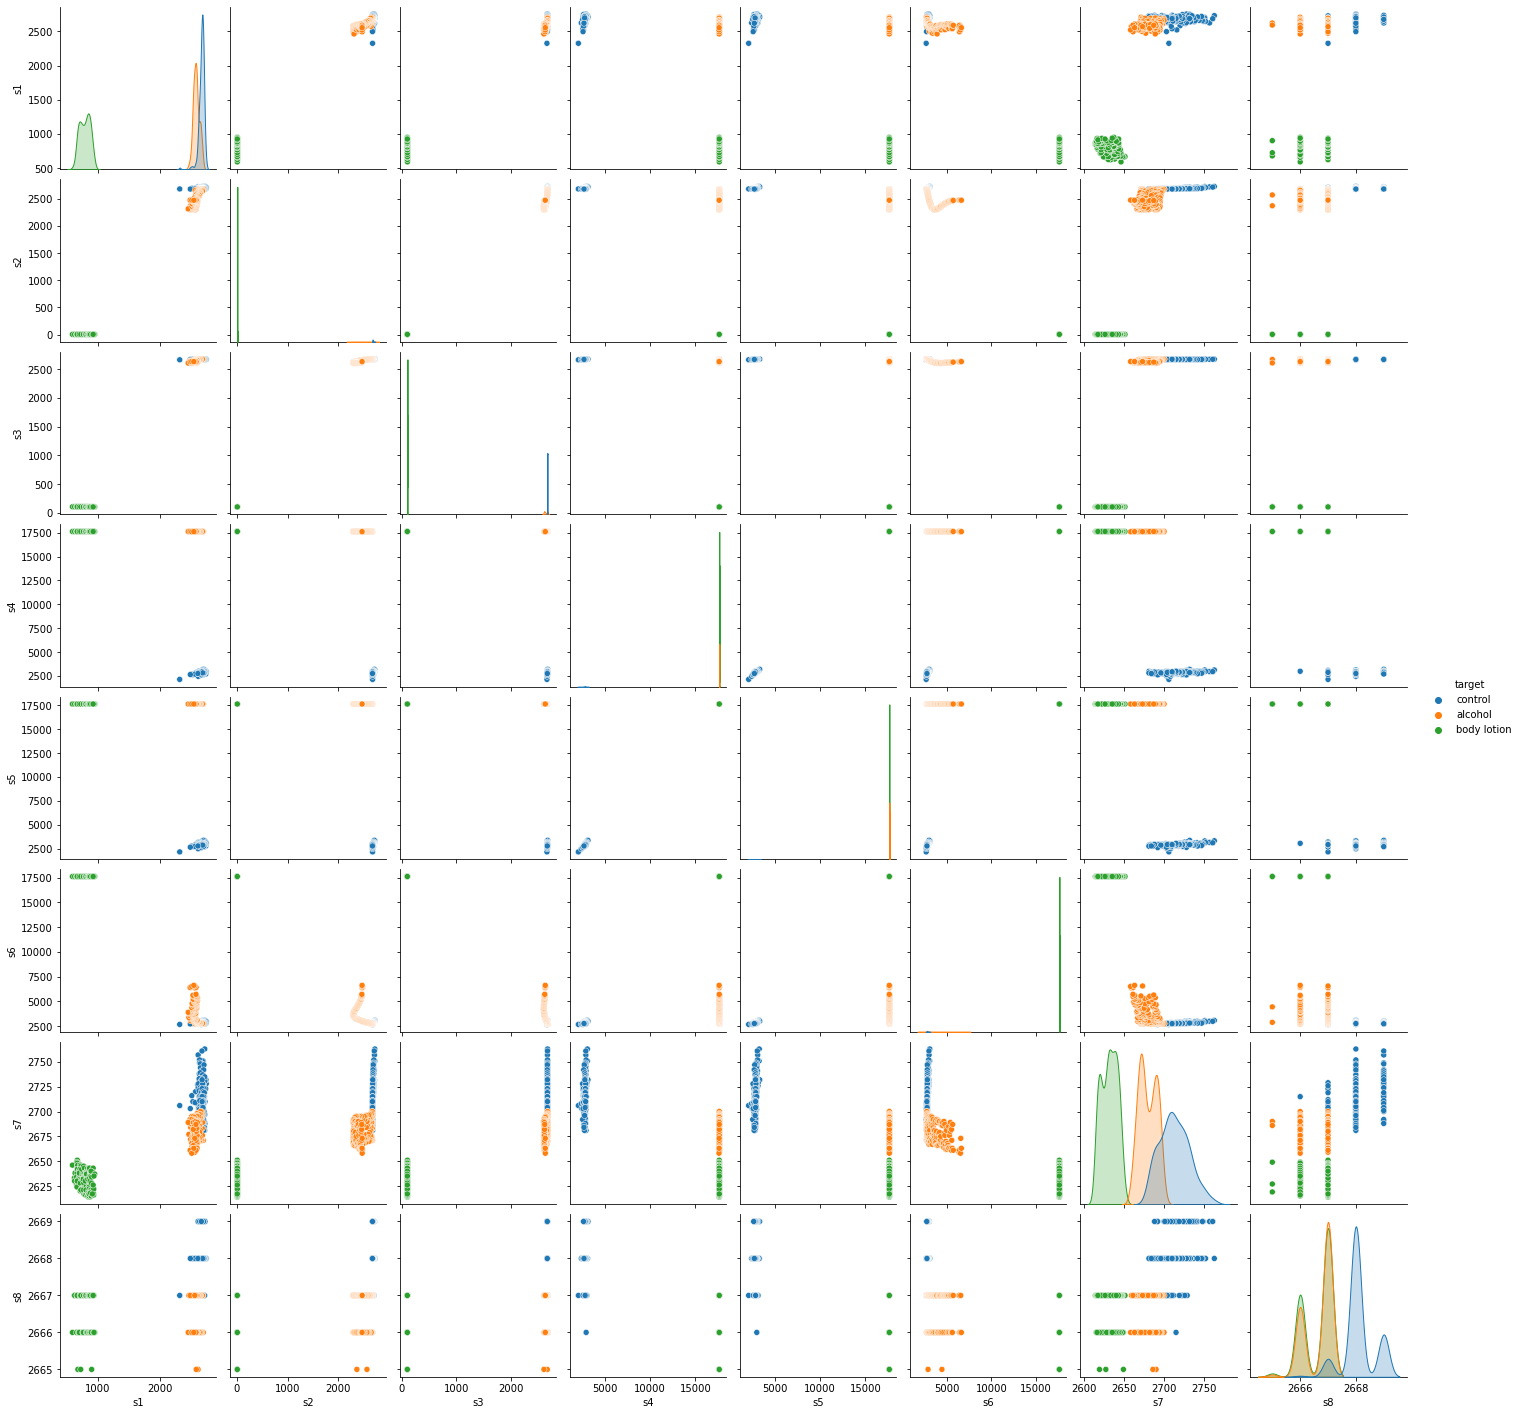

In [28]:
sns.pairplot(df, hue='target')

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
log_mod = LogisticRegression()

In [11]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = log_mod.predict(X_test)

In [13]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     alcohol       1.00      1.00      1.00        59
 body lotion       1.00      1.00      1.00        69
     control       1.00      1.00      1.00        71

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

[[59  0  0]
 [ 0 69  0]
 [ 0  0 71]]


In [36]:
log_mod.predict([[673,7,106,17625,17624,17625,2632,2667]])

array(['body lotion'], dtype=object)

In [37]:
log_mod.predict([[2405,789,2488,17617,17610,4419,2716,2667]])

array(['alcohol'], dtype=object)

In [38]:
log_mod.predict([[2676,2668,2667,2741,2782,2707,2689,2669]])

array(['control'], dtype=object)

In [41]:
log_mod.predict([[1674,7,83,4,5,6,2566,2668]])

array(['control'], dtype=object)

In [83]:
test = np.genfromtxt('data/test_control.csv', delimiter=',')
testdf = pd.DataFrame(test, columns=col_val)

In [84]:
log_mod.predict(testdf)

array(['control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 

In [ ]:
#38 bytes per line

In [85]:
testdf['target'] = 'control2'

In [86]:
df2 = pd.concat([testdf, df])

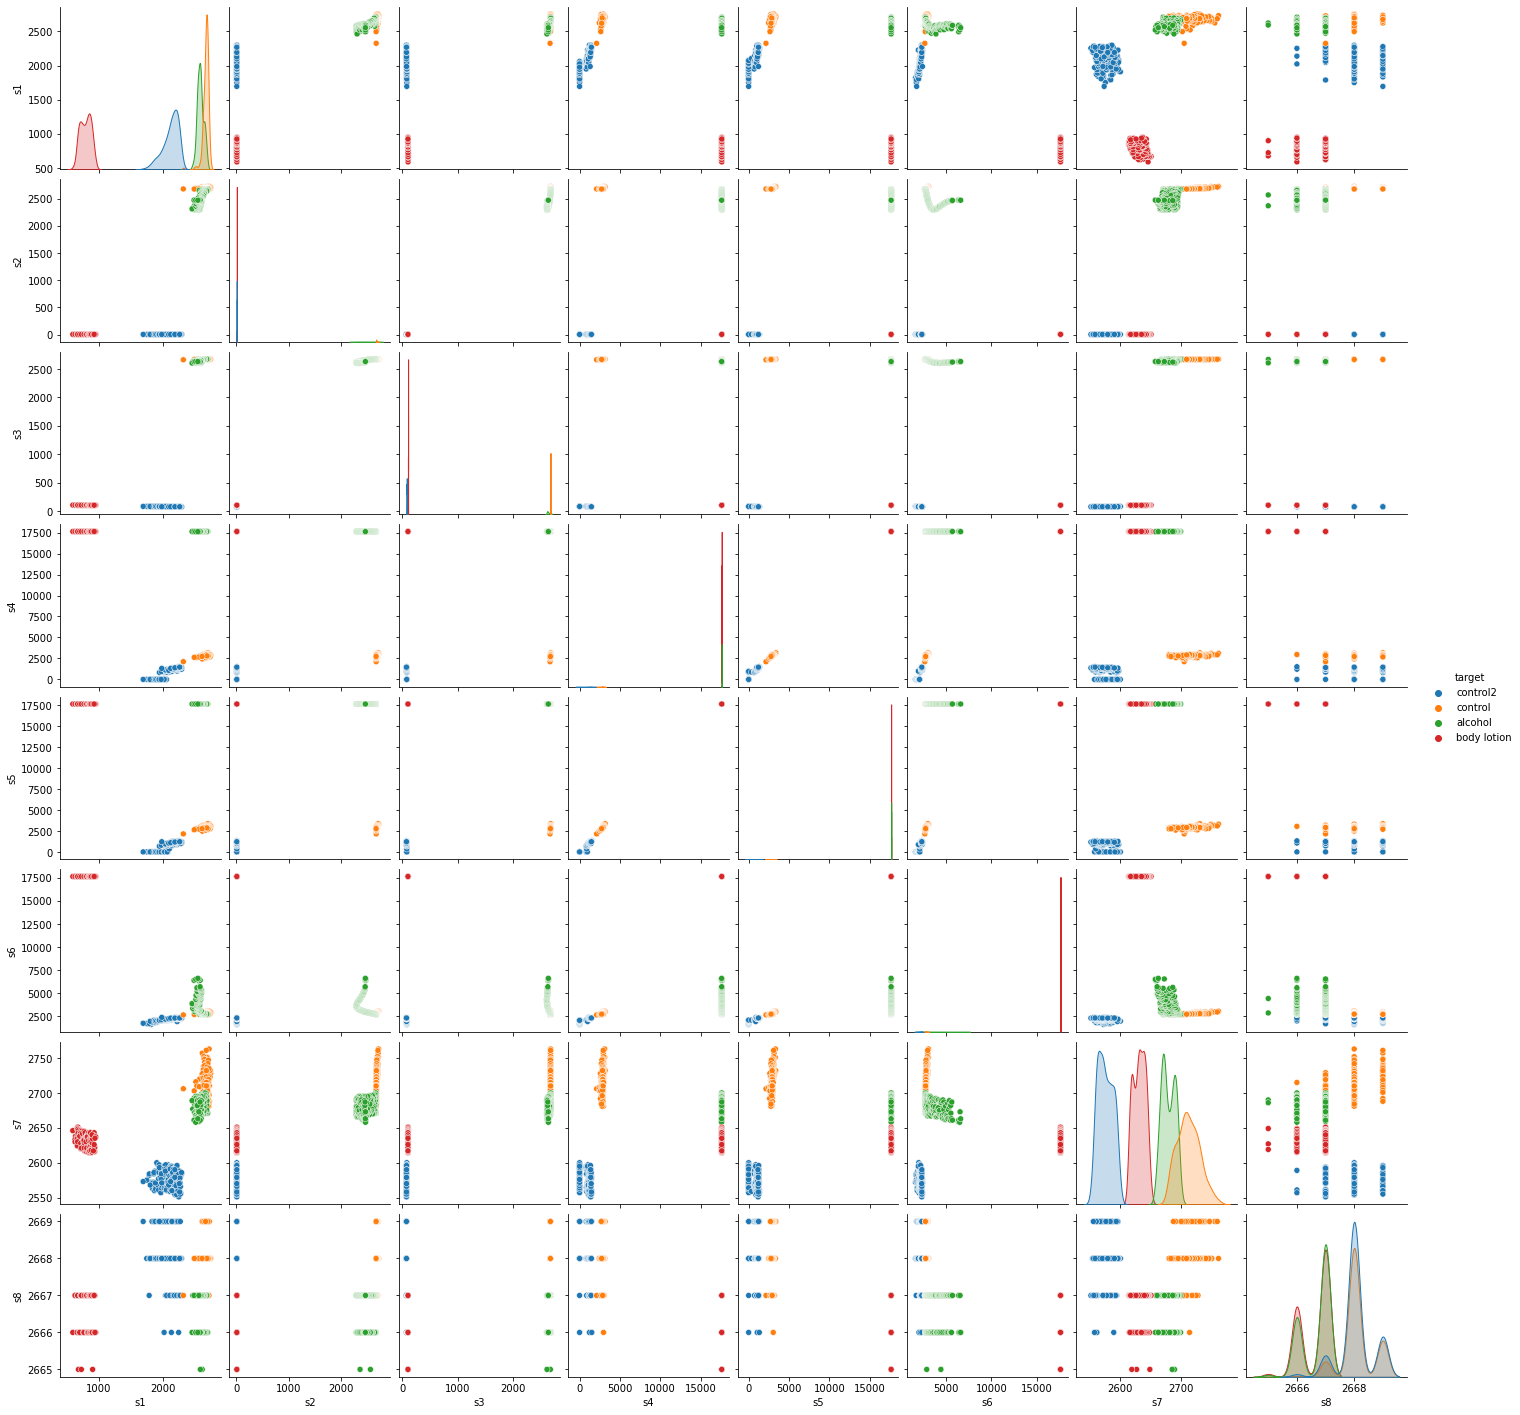

In [87]:
sns.pairplot(df2, hue='target')

In [95]:
 bl2 = np.genfromtxt('data/test_bodylotion.csv', delimiter=',')
bl2df = pd.DataFrame(bl2, columns=col_val)

In [96]:
log_mod.predict(bl2df)

array(['control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 

In [97]:
control3 = np.genfromtxt('data/test_control2.csv', delimiter=',')
control3_df = pd.DataFrame(control3, columns=col_val)

In [100]:
control3_df['target'] = 'control3'

In [101]:
df3 = pd.concat([df2, control3_df])

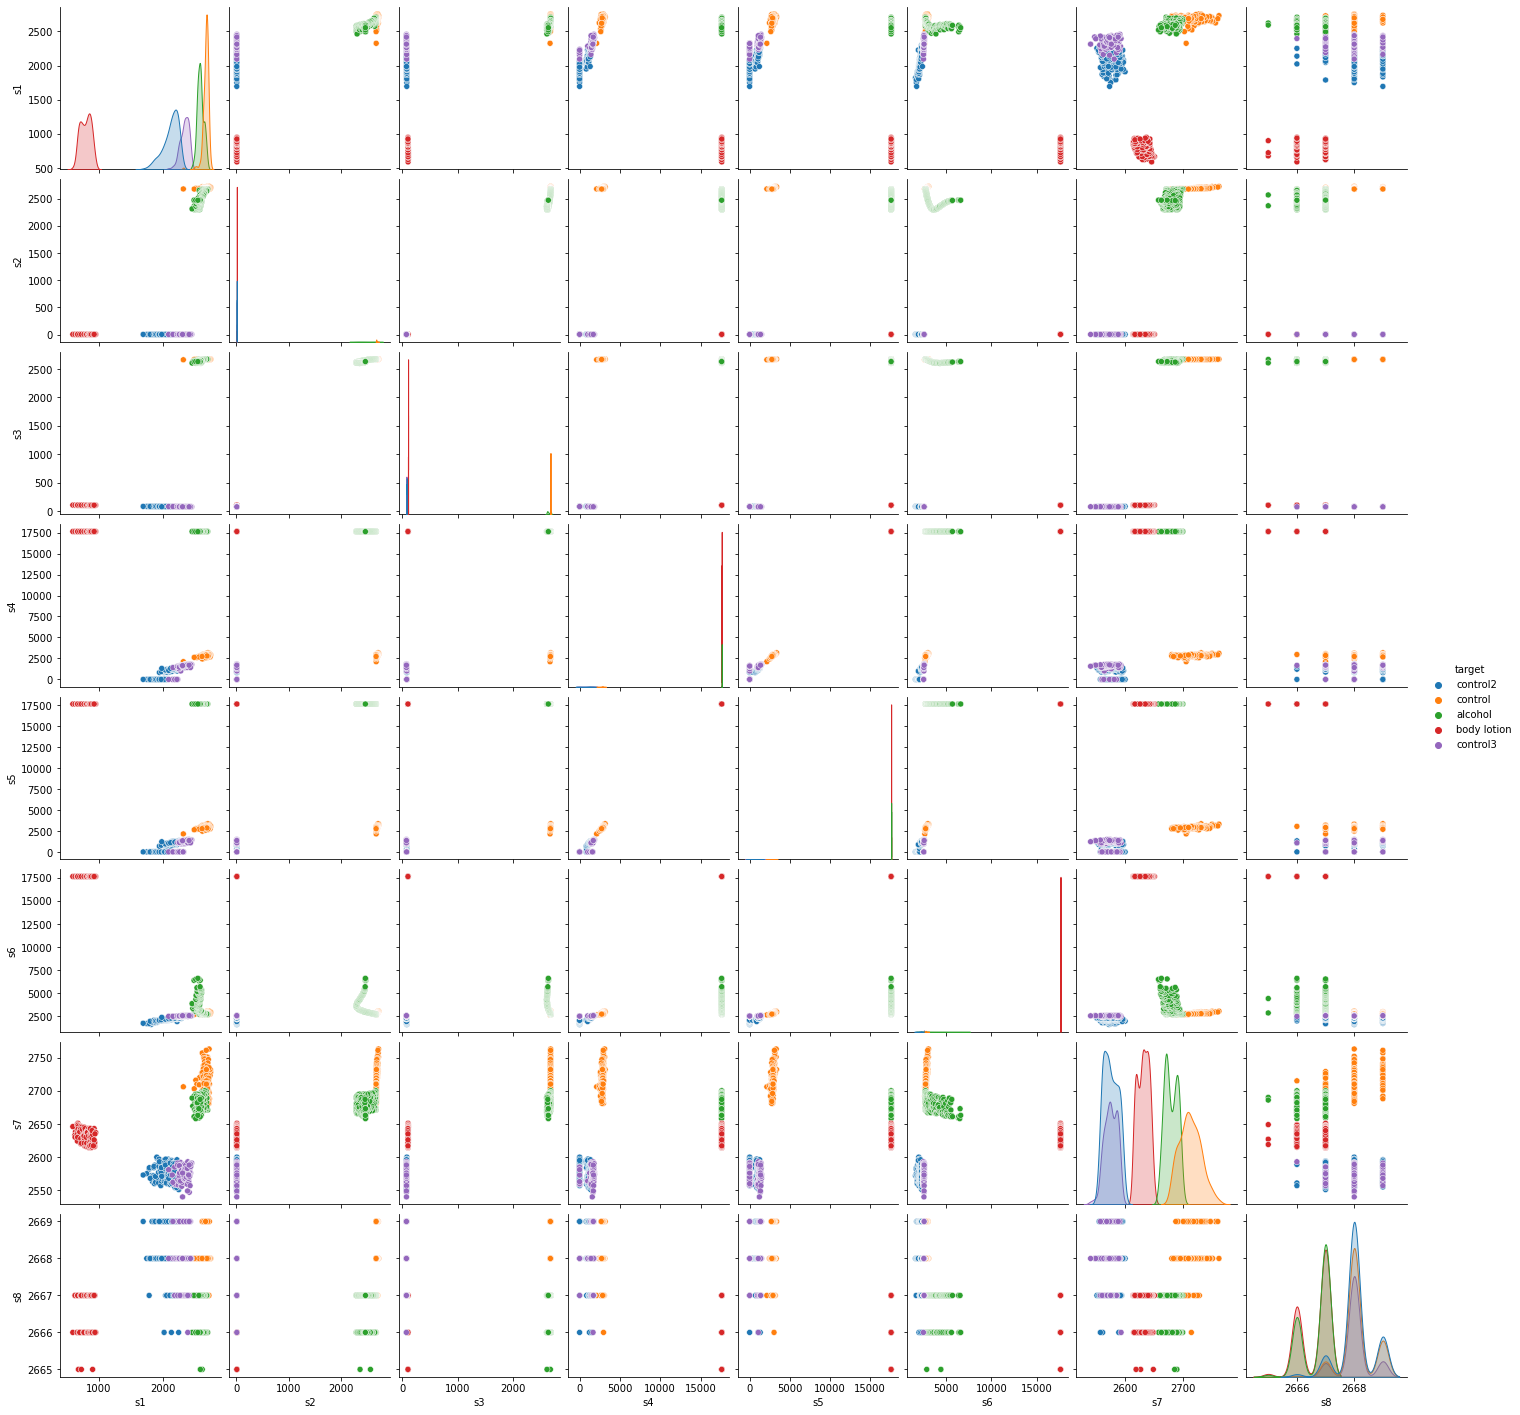

In [102]:
sns.pairplot(df3, hue='target')

In [103]:
test_alcohol = np.genfromtxt('data/test_alcohol.csv', delimiter=',')
testalcoholdf = pd.DataFrame(test_alcohol, columns=col_val)

In [104]:
log_mod.predict(testalcoholdf)

array(['control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control'], dtype=object)

In [21]:
log_mod.predict([[2528,6,2679,13550,15390,2792,2654,2668]])

array(['alcohol'], dtype=object)

In [15]:
sendata = np.genfromtxt('data/test_sensor.csv', delimiter=',')
sendf = pd.DataFrame(sendata, columns=col_val)

In [16]:
log_mod.predict(sendf)

array(['control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol',
       'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol',
       'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol',
       'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol',
       'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol', 'alcohol',
       'alcohol'], dtype=object)

In [17]:
log_mod.predict([[2545,2285,2708,17626,17625,2816,2683,2666]])

array(['alcohol'], dtype=object)